In [68]:
pip install plotly

Importing Packages

In [50]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

Load and Prepare the Data

In [51]:
df = pd.read_csv("1000_Companies.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Explore the Data

In [52]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [53]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


Data Preprocessing 

In [55]:
# Label Encode the Categorical Data
le = LabelEncoder()
df["State"] = le.fit_transform(df["State"])

In [56]:
X = df.drop("Profit", axis=1)
y = df["Profit"]

Split the Data

In [57]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Create and Train the Model

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Make Predictions

In [61]:
# Use the trained model to make predictions on the test data.
y_predict  = model.predict(X_test)

Evaluate the Model

In [62]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 30259162.760670938
R-squared: 0.98282072606409


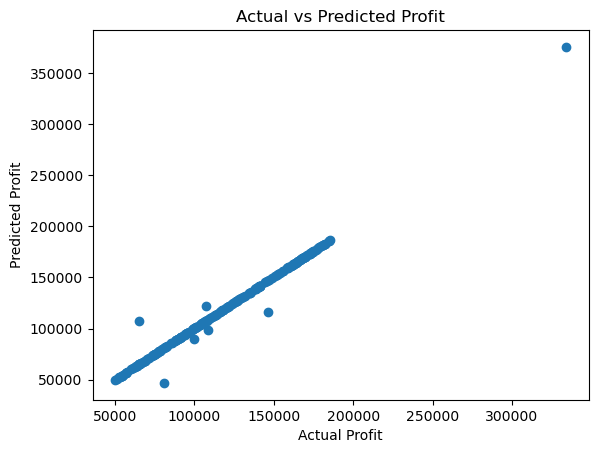

In [63]:
# Plot predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit')
plt.show()

In [67]:
# Add predictions to the original DataFrame
df['Predicted_Profit'] = model.predict(X)

# Sort by predicted profit
top_companies = df.sort_values(by='Predicted_Profit', ascending=False).head(10)

print(top_companies[["R&D Spend", "Administration", "Marketing Spend",'State', 'Predicted_Profit']])


     R&D Spend  Administration  Marketing Spend  State  Predicted_Profit
998  128456.23     321652.1400      281692.3200      0     375557.825478
999  161181.72     270939.8600      295442.1700      2     336337.107386
997  100275.47     241926.3100      227142.8200      0     265197.846053
1    162597.70     151377.5900      443898.5300      0     213180.686333
0    165349.20     136897.8000      471784.1000      2     200362.479562
957  159746.00     134049.1125      377009.3824      2     186340.427918
427  159570.00     134023.1201      376669.7899      1     186231.696211
849  159477.00     134009.3854      376490.3462      0     186194.459198
807  159196.00     133967.8860      375948.1559      1     185909.538737
423  159191.00     133967.1476      375938.5084      1     185905.231847
